<a href="https://colab.research.google.com/github/georgezoto/Coding-in-TensorFlow/blob/master/Time-Series-Prediction/Sample_Code_Weather_data_Madrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Time Series Prediction: Weather data Madrid, using ML and Deep Learning

**Meetup event, come and join us 😀**  
https://www.meetup.com/Deep-Learning-Adventures/events/272091576/

**Deep Learning YouTube recordings, feel free to share and subscribe 😀**  
https://bit.ly/deep-learning-tf  
https://bit.ly/deep-learning-tf-coding  

**Weather data Barajas Airport, Madrid, between 1997 and 2015 🎉**   
Gathered web https://www.wunderground.com/ The Weather Company, LLC  

https://www.kaggle.com/juliansimon/weather_madrid_lemd_1997_2015.csv

![alt text](https://secure.meetupstatic.com/photos/event/d/b/a/1/highres_491456225.jpeg)

In [1]:
import tensorflow as tf
print(tf.__version__)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import random
seed = 51
tf.random.set_seed(seed)
random.seed(seed)

2.3.0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Get the data
First download the dataset.

In [2]:
# upload the kaggle.json file from local computer
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!pip install kaggle --upgrade
!ls -l /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)
-rw-r--r-- 1 root root 66 Aug 29 20:07 /root/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d juliansimon/weather_madrid_lemd_1997_2015.csv

  0% 0.00/145k [00:00<?, ?B/s]
100% 145k/145k [00:00<00:00, 51.8MB/s]


In [5]:
!unzip weather_madrid_lemd_1997_2015.csv.zip > /dev/null

In [6]:
dataset_path = '/content/weather_madrid_LEMD_1997_2015.csv'
dataset_path

'/content/weather_madrid_LEMD_1997_2015.csv'

In [7]:
!head $dataset_path

CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity, Mean Humidity, Min Humidity, Max Sea Level PressurehPa, Mean Sea Level PressurehPa, Min Sea Level PressurehPa, Max VisibilityKm, Mean VisibilityKm, Min VisibilitykM, Max Wind SpeedKm/h, Mean Wind SpeedKm/h, Max Gust SpeedKm/h,Precipitationmm, CloudCover, Events,WindDirDegrees
1997-1-1,7,4,2,5,3,2,100,95,76,1010,1008,1004,10,9,4,13,6,,0.00,6,,229
1997-1-2,7,3,0,6,3,0,100,92,71,1007,1003,997,10,9,4,26,8,47,0.00,5,Rain,143
1997-1-3,5,3,2,5,1,-1,100,85,70,1005,999,996,10,10,7,27,19,,0.00,6,Rain-Snow,256
1997-1-4,7,3,-1,-2,-3,-4,86,63,49,1012,1010,1005,10,10,10,27,19,40,0.00,2,,284
1997-1-5,2,0,-1,2,0,-3,100,95,86,1012,1008,1005,10,5,1,14,6,,0.00,7,Snow,2
1997-1-6,7,3,1,2,-1,-3,100,82,57,1014,1010,1008,10,10,10,11,5,,0.00,4,,64
1997-1-7,2,0,-2,1,-1,-3,100,93,75,1016,1014,1009,10,7,0,6,2,,0.00,7,Snow,43
1997-1-8,8,4,1,7,4,1,100,96,87,1015,1005,1003,10,8,4,26,8,,0.00,7,Rain,273
1997-1

### Import dataset using pandas

In [8]:
dataset = pd.read_csv(dataset_path, parse_dates=['CET'])
dataset.rename(columns={'CET':'Date', ' CloudCover':'CloudCover', ' Events':'Events Original'}, inplace=True)
dataset.head()

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressurehPa,Mean Sea Level PressurehPa,Min Sea Level PressurehPa,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events Original,WindDirDegrees
0,1997-01-01,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,76.0,1010,1008,1004,10.0,9.0,4.0,13,6,NaN,0.0,6.0,NaN,229
1,1997-01-02,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,71.0,1007,1003,997,10.0,9.0,4.0,26,8,47.0,0.0,5.0,Rain,143
2,1997-01-03,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,70.0,1005,999,996,10.0,10.0,7.0,27,19,NaN,0.0,6.0,Rain-Snow,256
3,1997-01-04,7.0,3.0,-1.0,-2.0,-3.0,-4.0,86.0,63.0,49.0,1012,1010,1005,10.0,10.0,10.0,27,19,40.0,0.0,2.0,NaN,284
4,1997-01-05,2.0,0.0,-1.0,2.0,0.0,-3.0,100.0,95.0,86.0,1012,1008,1005,10.0,5.0,1.0,14,6,NaN,0.0,7.0,Snow,2


In [9]:
dataset.shape

(6812, 23)

In [10]:
dataset.dtypes

Date                           datetime64[ns]
Max TemperatureC                      float64
Mean TemperatureC                     float64
Min TemperatureC                      float64
Dew PointC                            float64
MeanDew PointC                        float64
Min DewpointC                         float64
Max Humidity                          float64
 Mean Humidity                        float64
 Min Humidity                         float64
 Max Sea Level PressurehPa              int64
 Mean Sea Level PressurehPa             int64
 Min Sea Level PressurehPa              int64
 Max VisibilityKm                     float64
 Mean VisibilityKm                    float64
 Min VisibilitykM                     float64
 Max Wind SpeedKm/h                     int64
 Mean Wind SpeedKm/h                    int64
 Max Gust SpeedKm/h                   float64
Precipitationmm                       float64
CloudCover                            float64
Events Original                   

In [11]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
dataset['Events'] = labelencoder.fit_transform(dataset['Events Original'].astype(str))
dataset[['Events Original', 'Events']].head(10)

,Events Original,Events
0,NaN,15
1,Rain,6
2,Rain-Snow,9
3,NaN,15
4,Snow,12
5,NaN,15
6,Snow,12
7,Rain,6
8,Rain,6
9,NaN,15


### Data Exploration

### Check for missing dates

In [12]:
dataset['Date']

0      1997-01-01
1      1997-01-02
2      1997-01-03
3      1997-01-04
4      1997-01-05
          ...    
6807   2015-12-27
6808   2015-12-28
6809   2015-12-29
6810   2015-12-30
6811   2015-12-31
Name: Date, Length: 6812, dtype: datetime64[ns]

In [13]:
missing_dates = pd.date_range(start = '1997-01-01', end = '2015-12-31' ).difference(dataset['Date'])
len(missing_dates)

127

In [14]:
#list(missing_dates)

### Keep only records from '2004-02-01' and forward

In [15]:
dataset_original = dataset.copy(deep=True)

In [16]:
dataset.shape

(6812, 24)

In [17]:
dataset = dataset[dataset['Date'] >= '2004-02-01'].reset_index(drop=True)
dataset.shape

(4352, 24)

### Train, Validaton and Test split

In [18]:
#Helpful method to plot series
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

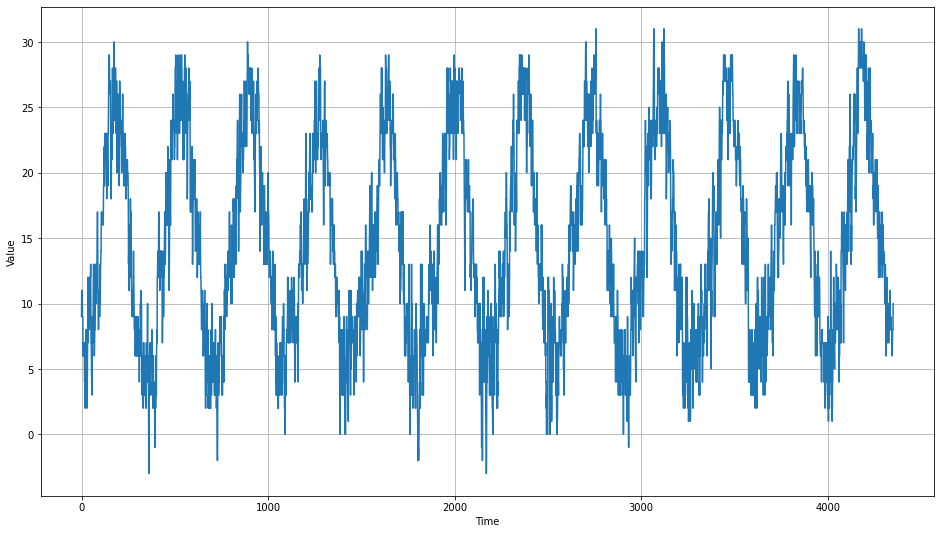

In [20]:
series = np.array(dataset['Mean TemperatureC'])
time = np.array(dataset.index)
plt.figure(figsize=(16, 9))
plt.ylabel('Mean TemperatureC')
plot_series(time, series)

In [ ]:
time

array([   0,    1,    2, ..., 4349, 4350, 4351])

In [ ]:
dataset[dataset['Date'] == '2012-12-31']

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressurehPa,Mean Sea Level PressurehPa,Min Sea Level PressurehPa,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events Original,WindDirDegrees,Events
3256,2012-12-31,4.0,2.0,1.0,3.0,2.0,1.0,100.0,98.0,81.0,1034,1027,1021,8.0,3.0,0.0,14,5,NaN,2.03,6.0,Fog-Rain,147,1


In [ ]:
dataset[dataset['Date'] == '2012-12-31'].index[0]

3256

In [ ]:
dataset.shape

(4352, 24)

In [ ]:
split_time = dataset[dataset['Date'] == '2012-12-31'].index[0] + 1
time_train = time[:split_time]
x_train = series[:split_time]

time_test = time[split_time:]
x_test = series[split_time:]

validation_split_time = dataset[dataset['Date'] == '2010-12-31'].index[0] + 1
time_valid = time_train[validation_split_time:]
x_valid = x_train[validation_split_time:]

## Model v1 - 3 layer DNN - MAE: 2.7199383

### Hyperparameter tuning

### Model architecture

### Setup and train our model

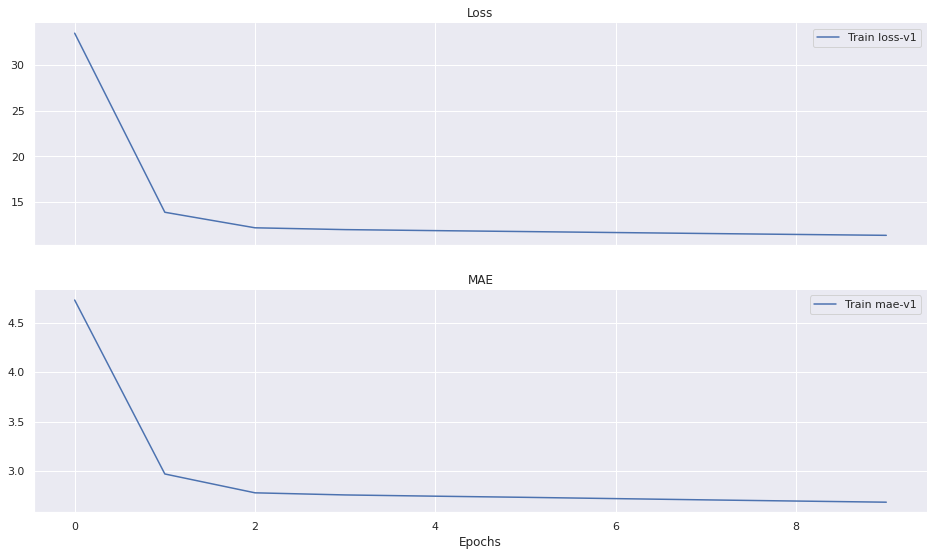

In [ ]:
plot_multiple_results([history_v1])

In [ ]:
forecast=[]
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]

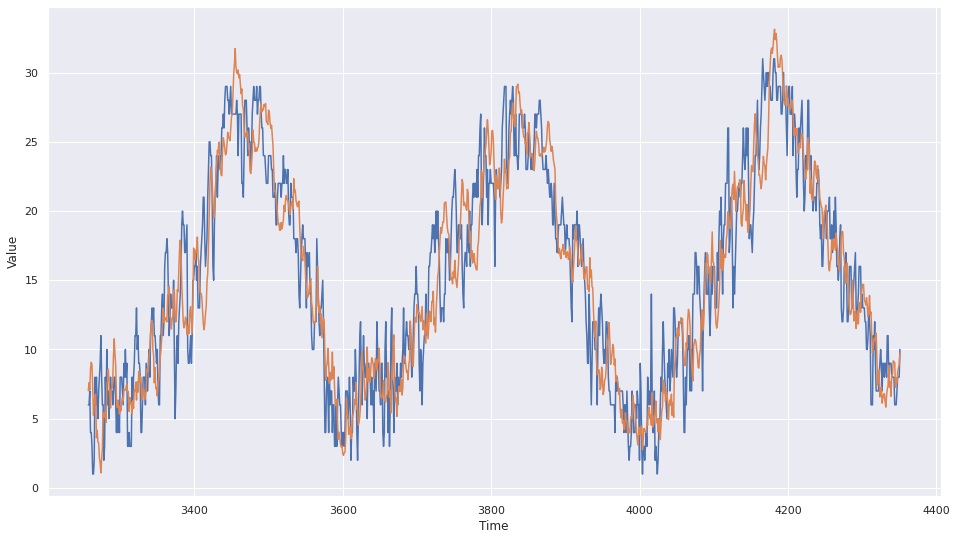

In [ ]:
plt.figure(figsize=(16, 9))

plot_series(time_test, x_test)
plot_series(time_test, results)

### MAE and MSE on test set

In [ ]:
tf.keras.metrics.mean_absolute_error(x_test, results).numpy()

2.5201786

In [ ]:
tf.keras.metrics.mean_squared_error(x_test, results).numpy()

9.923462

## Model v2 - Conv1D, 2x LSTM, 3 layer DNN, Lambda - MAE: 2.2436826

### Hyperparameter tuning

### Model architecture

### Setup and train our model

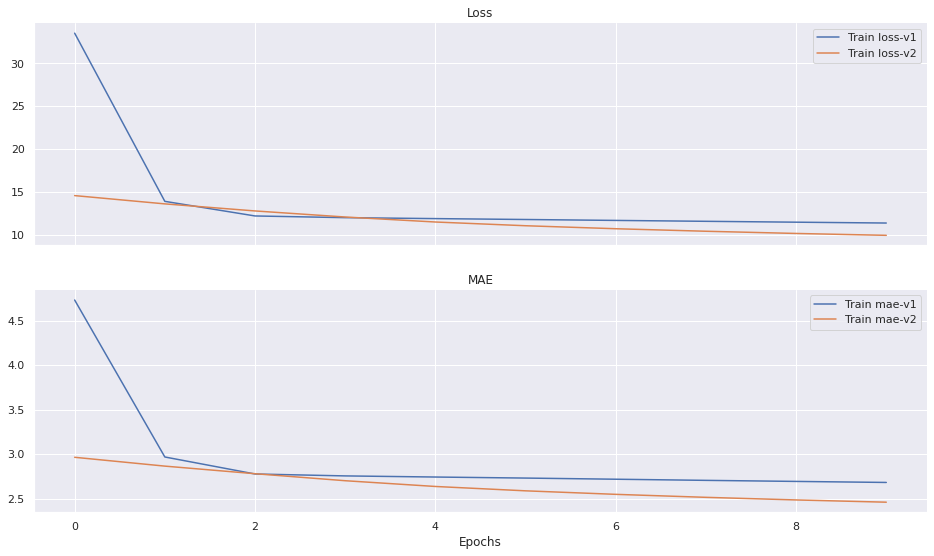

In [ ]:
plot_multiple_results([history_v1, history_v2])

In [ ]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

In [ ]:
rnn_forecast

array([1.2289181, 1.371546 , 2.1067932, ..., 6.017465 , 5.98617  ,
       6.3447742], dtype=float32)

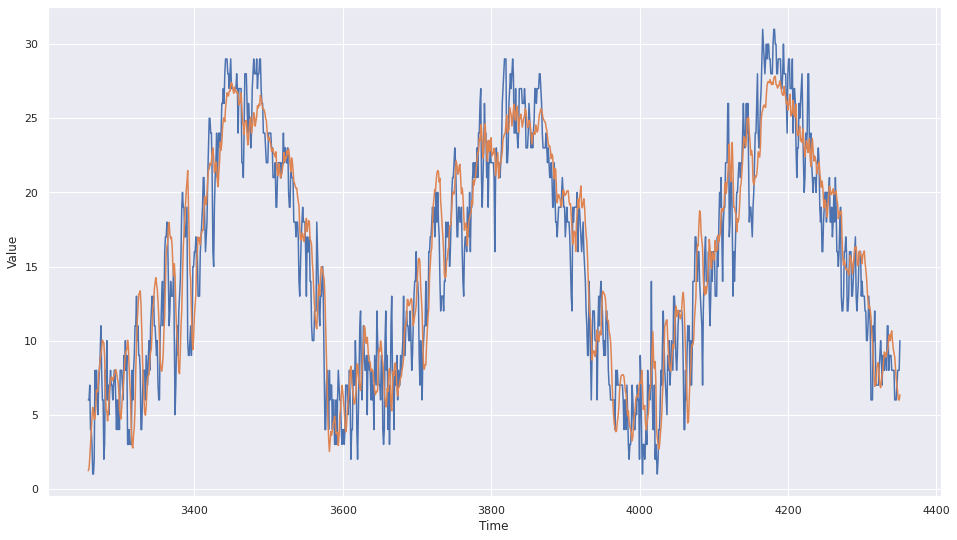

In [ ]:
plt.figure(figsize=(16, 9))
plot_series(time_test, x_test)
plot_series(time_test, rnn_forecast)

### MAE and MSE on test set

In [ ]:
tf.keras.metrics.mean_absolute_error(x_test, rnn_forecast).numpy()

2.2269807

In [ ]:
tf.keras.metrics.mean_squared_error(x_test, rnn_forecast).numpy()

8.045877

In [ ]:
print(len(rnn_forecast))
print(rnn_forecast)

1095
[1.2289181 1.371546  2.1067932 ... 6.017465  5.98617   6.3447742]


In [ ]:
#Condiser using other features 

In [ ]:
dataset.isna().sum()

Date                              0
Max TemperatureC                  0
Mean TemperatureC                 0
Min TemperatureC                  0
Dew PointC                        0
MeanDew PointC                    0
Min DewpointC                     0
Max Humidity                      0
 Mean Humidity                    0
 Min Humidity                     0
 Max Sea Level PressurehPa        0
 Mean Sea Level PressurehPa       0
 Min Sea Level PressurehPa        0
 Max VisibilityKm               630
 Mean VisibilityKm              630
 Min VisibilitykM               630
 Max Wind SpeedKm/h               0
 Mean Wind SpeedKm/h              0
 Max Gust SpeedKm/h            1400
Precipitationmm                   0
CloudCover                     1050
Events Original                3229
WindDirDegrees                    0
Events                            0
dtype: int64

In [ ]:
#Predict Events

In [ ]:
#Multivariate prediction

In [ ]:
#Arima models

In [ ]:
#Other time series libraries